The data attached is a two-year sales data of a pharma company which talks about 
sales in 2015 and 2016 across various regions and time frames.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
sales=pd.read_csv(r'C:\Users\Shiv_Shakti\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 4 - Python Visualizations Case Study\SalesData.csv')

In [3]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
sales.describe()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


In [6]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


Q1. Compare Sales by region for 2016 with 2015 using bar chart 

<Axes: title={'center': 'Sales Comparison by Region for 2015 and 2016'}, xlabel='Region'>

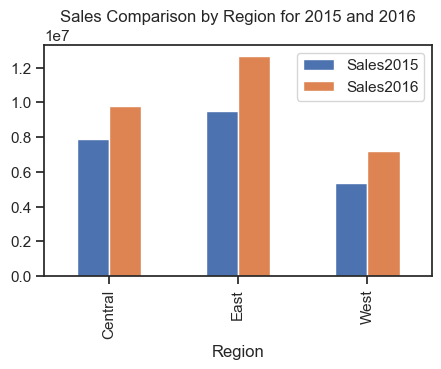

In [7]:
sales.pivot_table(index="Region",values=["Sales2015","Sales2016"], aggfunc="sum").plot(kind="bar",figsize=(5,3),title=('Sales Comparison by Region for 2015 and 2016'))

Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a 
Pie Chart

<Axes: title={'center': 'Sales by Region in 2016'}, ylabel='Sales2016'>

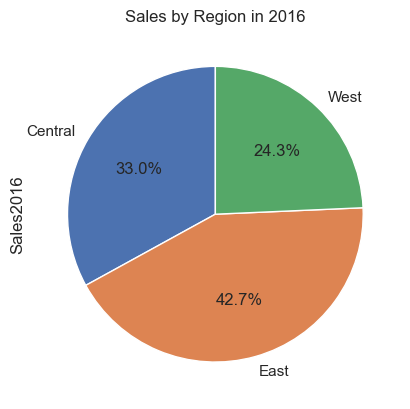

In [8]:
sales.groupby("Region").Sales2016.sum().plot(kind="pie", autopct='%1.1f%%',startangle=90,title=('Sales by Region in 2016'))

Q3. Compare sales of 2015 and 2016 with Region and Tiers 

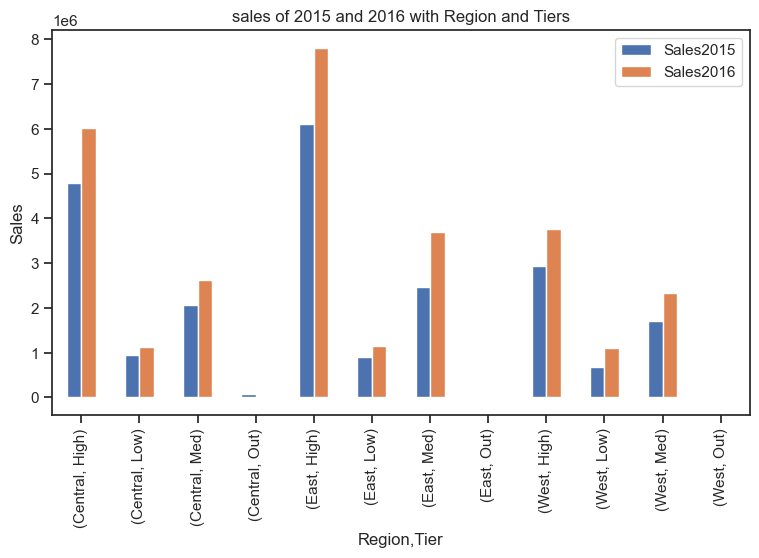

In [9]:
sales_region_tier=sales.pivot_table(index=["Region","Tier"], values=["Sales2015","Sales2016"], aggfunc="sum")

# Plot the data
sales_region_tier.plot(kind="bar",figsize=(9,5))
plt.ylabel("Sales")
plt.title("sales of 2015 and 2016 with Region and Tiers")
plt.show()

Q4.In East region, which state registered a decline in 2016 as compared to 2015?

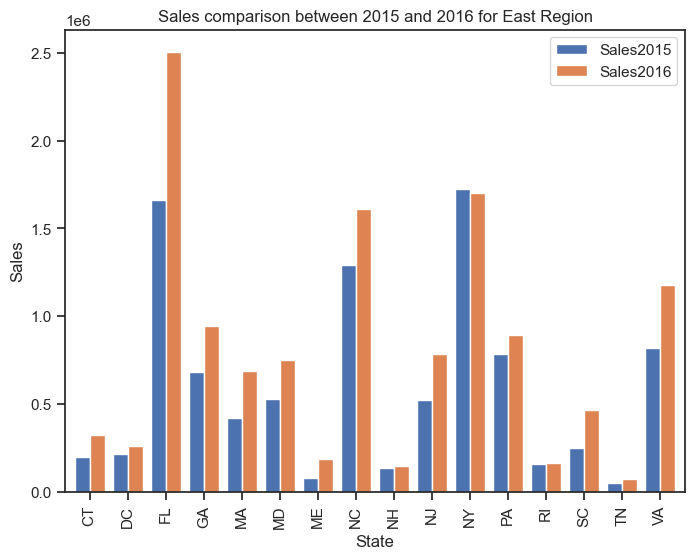

NY state registered a decline in sales in 2016 as compared to 2015


In [10]:
#grouping the data based on Region and State to find the total sales in 2015 and 2016
sales_state = sales.groupby(['Region', 'State'])[['Sales2015', 'Sales2016']].sum()

#filtering out sales for East region in 2015 and 2016 
sales_east = sales_state.loc["East"]

# Plot the data
sales_east.plot(kind="bar",figsize=(8,6),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()


print("NY state registered a decline in sales in 2016 as compared to 2015")

Q5.In all the High tier, which Division saw a decline in number of units sold in 2016 compared 
to 2015? 

In [11]:
#grouping the data based on tier and division to find the total sum of sales in 2015 and 2016
sales_division_tier =sales.groupby(["Tier","Division"])[["Units2015","Units2016"]].sum()
sales_division_tier

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [12]:
high_tier = sales_division_tier.loc["High"]
high_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<Axes: xlabel='Division'>

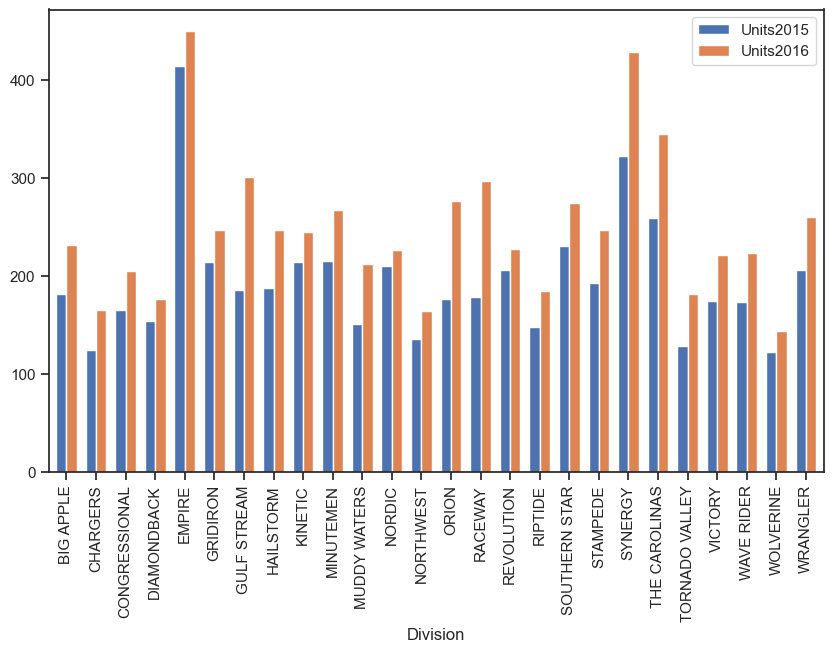

In [13]:
high_tier.plot(kind="bar",figsize=(10,6),width=0.7)

Q6.Create a new column Qtr using numpy.where() or any suitable utility in the imported 
dataset. The Quarters are based on months and defined as - 
• Jan - Mar : Q1 
• Apr - Jun : Q2 
• Jul - Sep : Q3 
• Oct - Dec : Q4    

In [14]:
#Define a dictionary to map months to quarters
quarter_mapping = {
    'Jan': 'Q1',
    'Feb': 'Q1',
    'Mar': 'Q1',
    'Apr': 'Q2',
    'May': 'Q2',
    'Jun': 'Q2',
    'Jul': 'Q3',
    'Aug': 'Q3',
    'Sep': 'Q3',
    'Oct': 'Q4',
    'Nov': 'Q4',
    'Dec': 'Q4',
}
# Use numpy.where to create the "Qtr" column based on the mapping
sales['Qtr'] = np.where(sales['Month'].isin(quarter_mapping.keys()), sales['Month'].map(quarter_mapping), None)

sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

<Axes: title={'center': 'Quarter wise sales in 2015 and 2016'}, xlabel='Qtr'>

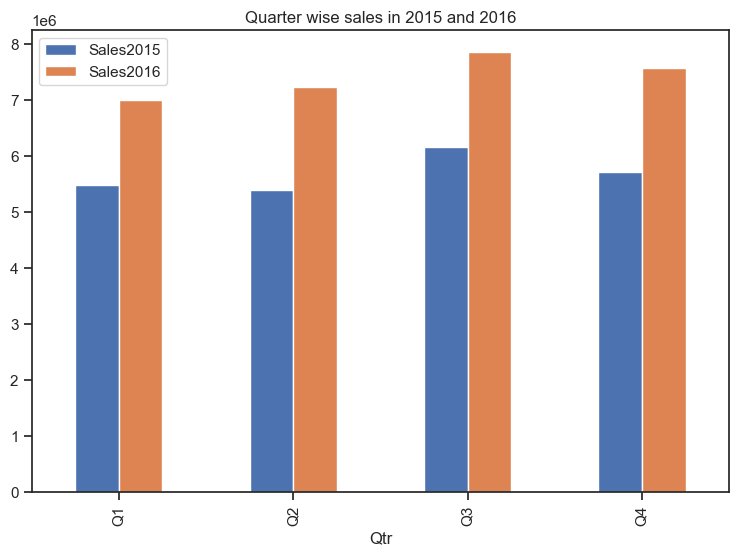

In [15]:
sales.pivot_table(index="Qtr",values=["Sales2015","Sales2016"], aggfunc="sum").plot(kind="bar",figsize=(9,6),title=('Quarter wise sales in 2015 and 2016'))

Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a 
pie chart. 
        (Draw 4 pie charts representing a Quarter for each Tier)

In [25]:
#grouping the data based on "Qtr" and "Tier" to find total sales in 2016
qtr_pivot = sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')
# qtr_pivot=qtr_pivot.drop(qtr_pivot['Out'],axis=1) 
display(qtr_pivot)

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


In [26]:
# Replace negative values with 0 in the qtr_pivot DataFrame
qtr_pivot[['High', 'Low', 'Med', 'Out']] = qtr_pivot[['High', 'Low', 'Med', 'Out']].applymap(lambda x: max(x, 0))

# The result will have negative values replaced with 0
print(qtr_pivot)


Tier         High          Low          Med  Out
Qtr                                             
Q1    7974.677515  5516.469593  7654.041681  0.0
Q2    8752.018136  5031.608757  8758.157542  0.0
Q3    9334.404693  5446.422671  8197.976091  0.0
Q4    9386.142545  5052.104694  8307.596804  0.0


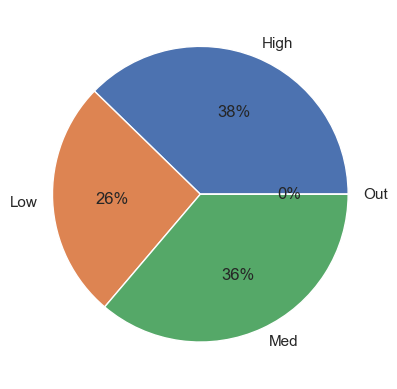

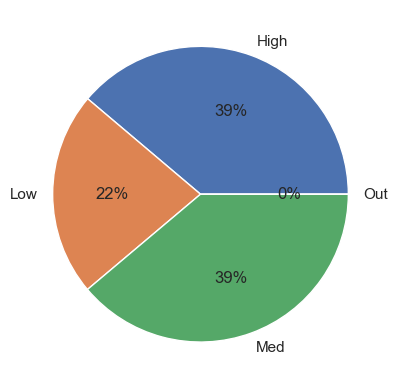

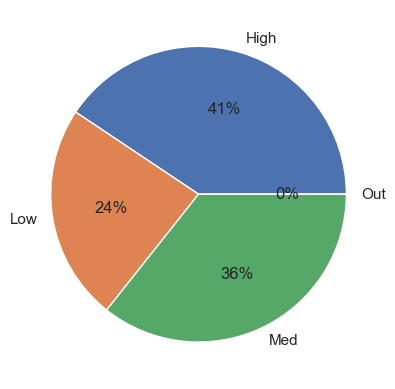

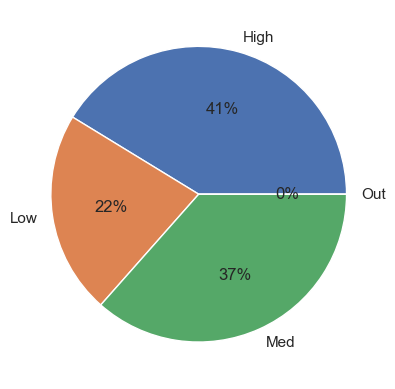

In [27]:
#Qtr Q1
Q1=plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show(Q1)

#Qtr Q2
Q2=plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show(Q2)

#Qtr 
Q3=plt.pie(x=qtr_pivot.loc["Q3",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show(Q3)

#Qtr 
Q4=plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show(Q4)